In [16]:
import pandas as pd

input_path = 'dataset/v5_cleaned_dataset.csv'
input_csv = pd.read_csv(input_path)

train = input_csv.drop(columns='sii')
y = input_csv['sii']

train.shape, y.shape

((2736, 70), (2736,))

# kNN

### priova numero 1 proviamo il kNN per valori di k tra 1 e 100 senza nessun tipo di scalabilità dei dati in input

In [17]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [18]:
lower_bound = 1
upper_bound = 100
region = range(lower_bound, upper_bound)
graph_accuaracies = []
graph_scores = []

In [19]:
import matplotlib.pyplot as plt
def print_analysis():
    plt.figure(figsize=(12, 6))
    plt.plot(region, graph_accuaracies, label='Test Accuracy', marker='o')
    plt.plot(region, graph_scores, label='Cross-Validation Score', marker='x')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Score')
    plt.title('Accuracy and Cross-Validation Score vs. k')
    plt.legend()
    plt.grid()
    plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25, random_state=42)

graph_accuaracies = []
graph_scores      = []

for k in region: # try k from 1 to 100

    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train )
    y_pred = kNN.predict( X_test )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    graph_accuaracies.append(acc)
    scr = cross_val_score(kNN, train, y, cv=4).mean()
    graph_scores.append(scr)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k:  1 | Accuracy 0.493  | Cross validation score 0.488
k:  2 | Accuracy 0.582  | Cross validation score 0.563
k:  3 | Accuracy 0.560  | Cross validation score 0.536
k:  4 | Accuracy 0.554  | Cross validation score 0.543
k:  5 | Accuracy 0.561  | Cross validation score 0.541
k:  6 | Accuracy 0.554  | Cross validation score 0.550
k:  7 | Accuracy 0.566  | Cross validation score 0.555
k:  8 | Accuracy 0.564  | Cross validation score 0.562
k:  9 | Accuracy 0.566  | Cross validation score 0.562
k: 10 | Accuracy 0.567  | Cross validation score 0.566
k: 11 | Accuracy 0.576  | Cross validation score 0.564
k: 12 | Accuracy 0.576  | Cross validation score 0.560
k: 13 | Accuracy 0.579  | Cross validation score 0.558
k: 14 | Accuracy 0.585  | Cross validation score 0.564
k: 15 | Accuracy 0.586  | Cross validation score 0.565
k: 16 | Accuracy 0.588  | Cross validation score 0.562
k: 17 | Accuracy 0.595  | Cross validation score 0.562
k: 18 | Accuracy 0.585  | Cross validation score 0.563
k: 19 | Ac

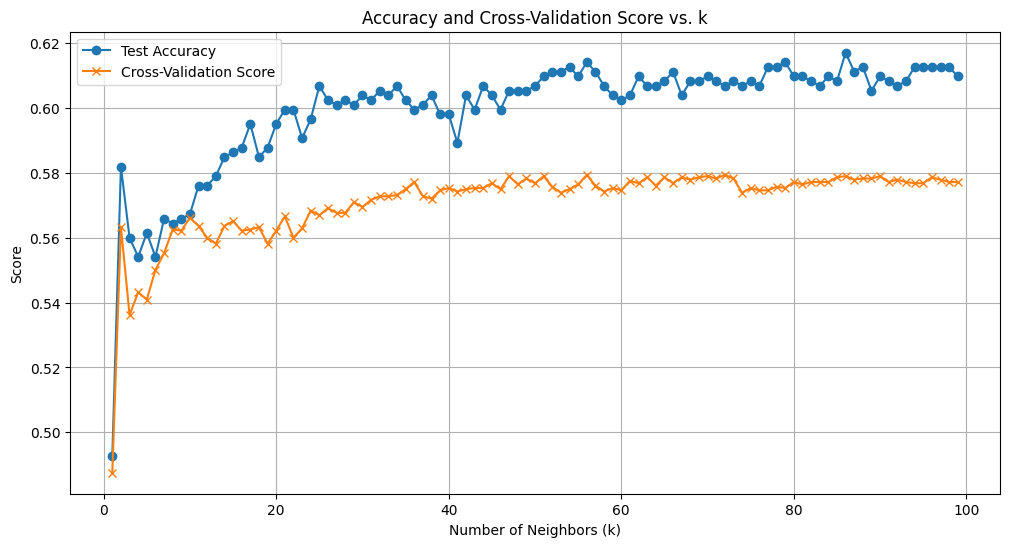

In [21]:
print_analysis()

In [22]:
#for f in train.columns:
    #print ("Feature {:} -> Scale: {:7.2f}".format(f, train.loc[:,f].max() - train.loc[:,f].min()) )

Now I'm gonna try with two different scales

In [23]:
#MinMaxScaler:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25, random_state=42)

graph_accuaracies = []
graph_scores      = []

scaler = MinMaxScaler()


X_train_MinMax_scaled = scaler.fit_transform(X_train)
X_test_MinMax_scaled = scaler.transform(X_test)

for k in region:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train_MinMax_scaled, y_train)
    y_pred = kNN.predict(X_test_MinMax_scaled)

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    graph_accuaracies.append(acc)
    scr = cross_val_score(kNN, train, y, cv=4).mean()
    graph_scores.append(scr)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k:  1 | Accuracy 0.468  | Cross validation score 0.488
k:  2 | Accuracy 0.558  | Cross validation score 0.563
k:  3 | Accuracy 0.547  | Cross validation score 0.536
k:  4 | Accuracy 0.564  | Cross validation score 0.543
k:  5 | Accuracy 0.566  | Cross validation score 0.541
k:  6 | Accuracy 0.596  | Cross validation score 0.550
k:  7 | Accuracy 0.558  | Cross validation score 0.555
k:  8 | Accuracy 0.583  | Cross validation score 0.562
k:  9 | Accuracy 0.576  | Cross validation score 0.562
k: 10 | Accuracy 0.614  | Cross validation score 0.566
k: 11 | Accuracy 0.602  | Cross validation score 0.564
k: 12 | Accuracy 0.604  | Cross validation score 0.560
k: 13 | Accuracy 0.605  | Cross validation score 0.558
k: 14 | Accuracy 0.608  | Cross validation score 0.564
k: 15 | Accuracy 0.613  | Cross validation score 0.565
k: 16 | Accuracy 0.615  | Cross validation score 0.562
k: 17 | Accuracy 0.621  | Cross validation score 0.562
k: 18 | Accuracy 0.621  | Cross validation score 0.563
k: 19 | Ac

Now I would like to plot the improvements of my model with the variation of k:

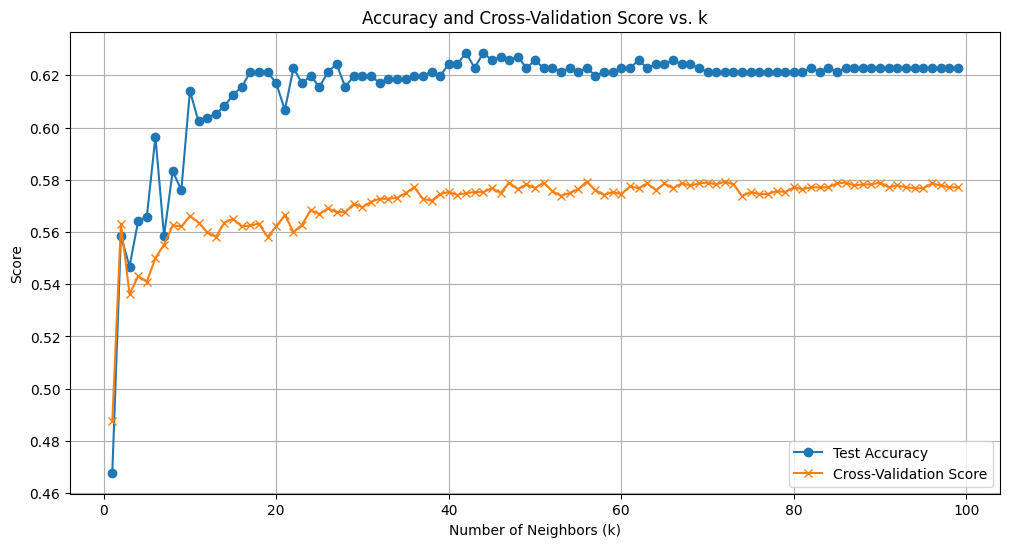

In [24]:
print_analysis()

In [25]:
#StandardScaler:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25, random_state=42)

graph_accuaracies = []
graph_scores      = []

scaler = StandardScaler()

X_train_Std_scaled = scaler.fit_transform(X_train)
X_test_Std_scaled = scaler.transform(X_test)

for k in region:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train_Std_scaled, y_train)
    y_pred = kNN.predict(X_test_Std_scaled)

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    graph_accuaracies.append(acc)
    scr = cross_val_score(kNN, train, y, cv=4).mean()
    graph_scores.append(scr)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k:  1 | Accuracy 0.506  | Cross validation score 0.488
k:  2 | Accuracy 0.589  | Cross validation score 0.563
k:  3 | Accuracy 0.542  | Cross validation score 0.536
k:  4 | Accuracy 0.577  | Cross validation score 0.543
k:  5 | Accuracy 0.563  | Cross validation score 0.541
k:  6 | Accuracy 0.572  | Cross validation score 0.550
k:  7 | Accuracy 0.583  | Cross validation score 0.555
k:  8 | Accuracy 0.591  | Cross validation score 0.562
k:  9 | Accuracy 0.586  | Cross validation score 0.562
k: 10 | Accuracy 0.592  | Cross validation score 0.566
k: 11 | Accuracy 0.589  | Cross validation score 0.564
k: 12 | Accuracy 0.598  | Cross validation score 0.560
k: 13 | Accuracy 0.604  | Cross validation score 0.558
k: 14 | Accuracy 0.607  | Cross validation score 0.564
k: 15 | Accuracy 0.607  | Cross validation score 0.565
k: 16 | Accuracy 0.613  | Cross validation score 0.562
k: 17 | Accuracy 0.613  | Cross validation score 0.562
k: 18 | Accuracy 0.607  | Cross validation score 0.563
k: 19 | Ac

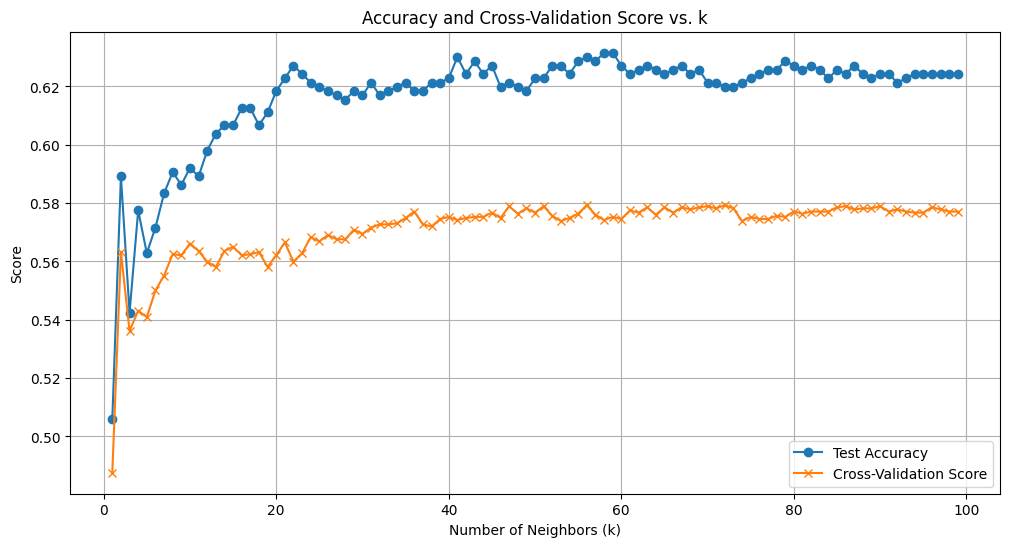

In [26]:
print_analysis()

Come possiamo vedere la gran parte dei miglioramenti sono ottenuti tra i 30 ed i 70 neighbours. Restringo quindi i miei bound

Mi estraggo la feature importance, le normalizzo e computo il classifier con le features pesate.
Provo poi ad utilizzare una custom distance basata sulla mia feature importance

In [27]:
lower_bound = 25
upper_bound = 75

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest to compute feature importance
rf = RandomForestClassifier(n_estimators=55, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_

# Normalize importance values to [0, 1]
normalized_importances = importances / importances.max()

In [29]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(train)
X_weigthed = X_scaled * normalized_importances

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_weigthed, y, test_size=0.25, random_state=42)

graph_accuaracies = []
graph_scores      = []

for k in range(lower_bound, upper_bound):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_test_Std_scaled)

    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    graph_accuaracies.append(acc)
    scr = cross_val_score(kNN, train, y, cv=4).mean()
    graph_scores.append(scr)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k: 25 | Accuracy 0.618  | Cross validation score 0.567
k: 26 | Accuracy 0.621  | Cross validation score 0.569
k: 27 | Accuracy 0.620  | Cross validation score 0.568
k: 28 | Accuracy 0.623  | Cross validation score 0.568
k: 29 | Accuracy 0.621  | Cross validation score 0.571
k: 30 | Accuracy 0.617  | Cross validation score 0.569
k: 31 | Accuracy 0.614  | Cross validation score 0.572
k: 32 | Accuracy 0.617  | Cross validation score 0.573
k: 33 | Accuracy 0.617  | Cross validation score 0.573
k: 34 | Accuracy 0.617  | Cross validation score 0.573
k: 35 | Accuracy 0.623  | Cross validation score 0.575
k: 36 | Accuracy 0.621  | Cross validation score 0.577
k: 37 | Accuracy 0.623  | Cross validation score 0.573
k: 38 | Accuracy 0.629  | Cross validation score 0.572
k: 39 | Accuracy 0.626  | Cross validation score 0.575
k: 40 | Accuracy 0.621  | Cross validation score 0.575
k: 41 | Accuracy 0.624  | Cross validation score 0.574
k: 42 | Accuracy 0.624  | Cross validation score 0.575
k: 43 | Ac

Proviamo ora il secondo tentativo:

In [31]:
from scipy.spatial.distance import minkowski

def weighted_minkowski(u, v, weights):
    return minkowski(u * weights, v * weights, p=2)

In [32]:
weights = normalized_importances  # Use normalized feature importances

X_train, X_test, y_train, y_test = train_test_split(X_weigthed, y, test_size=0.25, random_state=42)

graph_accuaracies = []
graph_scores      = []

#for k in range(lower_bound, upper_bound):
knn = KNeighborsClassifier(n_neighbors=53, metric=lambda u, v: weighted_minkowski(u, v, weights))
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
graph_accuaracies.append(acc)
scr = cross_val_score(knn, train, y, cv=4).mean()
graph_scores.append(scr)
print ("k: {:2d} | Accuracy {:.3f}".format(k,acc), " | Cross validation score {:.3f}".format(scr))

k: 74 | Accuracy 0.635  | Cross validation score 0.580


**Considerazioni:**

Non c'è particolare miglioramento rispetto ai due dataset testati. Entrambi in esecuzione raggiungono come massima accuracy 0.63 circa